In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#will need to standardize data within game, double check no null values, etc

In [6]:
df = pd.read_csv("data/MOBA_dataset.csv")

df.info()

print("Null values are ")
print()
print(df.isnull().sum())
print()

df.describe()

print("SHAPE:", df.shape)

df.head()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             648 non-null    object 
 1   league           648 non-null    int64  
 2   dota             648 non-null    int64  
 3   mobile legends   648 non-null    int64  
 4   heroes           648 non-null    int64  
 5   smite            648 non-null    int64  
 6   hp               648 non-null    int64  
 7   hplvl            648 non-null    float64
 8   hpregen          648 non-null    float64
 9   hpregenlvl       648 non-null    float64
 10  mana             648 non-null    int64  
 11  manalvl          648 non-null    float64
 12  manaregen        648 non-null    float64
 13  manaregenlvl     648 non-null    float64
 14  armor            648 non-null    float64
 15  armorlvl         648 non-null    float64
 16  magicres         648 non-null    float64
 17  mrlvl           

,name,league,dota,mobile legends,heroes,smite,hp,hplvl,hpregen,hpregenlvl,...,attackrange,movespeed,pricefree,pricepaid,difficulty,meleerange,rangedrange,manaresource,support,gender
643,Yemoja,0,0,0,0,1,490,95.0,6.0,0.70,...,55,365.0,0,0,1,0,1,1,1,2
644,Ymir,0,0,0,0,1,510,104.0,8.0,0.90,...,12,370.0,0,0,0,1,0,1,1,0
645,Yu Huang,0,0,0,0,1,400,77.0,7.0,0.47,...,55,355.0,5500,200,1,0,1,1,0,0
646,Zeus,0,0,0,0,1,380,71.0,6.0,0.45,...,55,360.0,5500,200,1,0,1,1,0,0
647,Zhong Kui,0,0,0,0,1,450,85.0,6.0,0.44,...,55,360.0,5500,200,0,0,1,1,0,0


In [7]:
# No null values - replaced N/As in cleaning for Odette and Freya with maximum prices, since limited / task based currency
# 647 characters, 32 rows (30 features and name + target gender)


#clean attack speed
df['baseattackspeed'] = (
    df['baseattackspeed']
      .astype(str)
      .str.extract(r'([\d\.]+)')      # keep only numbers/decimals
      .astype(float)
)

# Clean move speed
df['attackrange'] = (
    df['attackrange']
      .astype(str)
      .str.extract(r'(\d+)')      # extract integer
      .astype(float)
)

df.info()

#now all ints/float types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             648 non-null    object 
 1   league           648 non-null    int64  
 2   dota             648 non-null    int64  
 3   mobile legends   648 non-null    int64  
 4   heroes           648 non-null    int64  
 5   smite            648 non-null    int64  
 6   hp               648 non-null    int64  
 7   hplvl            648 non-null    float64
 8   hpregen          648 non-null    float64
 9   hpregenlvl       648 non-null    float64
 10  mana             648 non-null    int64  
 11  manalvl          648 non-null    float64
 12  manaregen        648 non-null    float64
 13  manaregenlvl     648 non-null    float64
 14  armor            648 non-null    float64
 15  armorlvl         648 non-null    float64
 16  magicres         648 non-null    float64
 17  mrlvl           

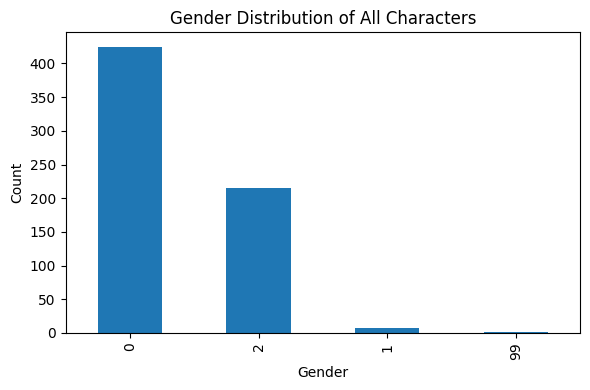

gender
0     425
2     215
1       7
99      1
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(6,4))
df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution of All Characters")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(df['gender'].value_counts())

In [ ]:
# non gendered characters - 
#Fiddlesticks, Kindred, Io, Jakiro, Phoenix, Puck, Techies, Jawhead

#we will remove 8 characters

In [8]:
#looking at filtered

filtered_df = df[(df['gender'] == 0) | (df['gender'] == 2)]

#changing gender values of 2 to 1, for binary
filtered_df.loc[filtered_df['gender'] == 2, 'gender'] = 1

filtered_df.describe()

filtered_df.head()

,name,league,dota,mobile legends,heroes,smite,hp,hplvl,hpregen,hpregenlvl,...,attackrange,movespeed,pricefree,pricepaid,difficulty,meleerange,rangedrange,manaresource,support,gender
0,Aatrox,1,0,0,0,0,650,114.0,3.00,0.50,...,175.0,345.0,2400,880,2,1,0,0,0,0
1,Ahri,1,0,0,0,0,590,104.0,2.50,0.60,...,550.0,330.0,1575,790,2,0,1,1,0,1
2,Akali,1,0,0,0,0,600,121.0,9.00,0.90,...,125.0,345.0,1575,790,3,1,0,0,0,1
3,Akshan,1,0,0,0,0,630,115.0,3.75,0.65,...,500.0,330.0,2400,880,3,0,1,1,0,0
4,Alistar,1,0,0,0,0,685,120.0,8.50,0.85,...,125.0,330.0,675,585,1,1,0,1,1,0


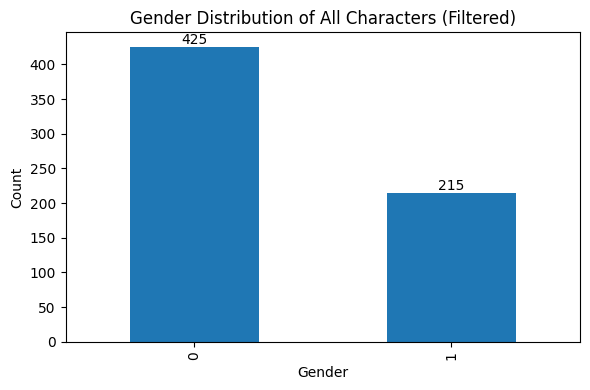

gender
0    425
1    215
Name: count, dtype: int64


In [8]:
#filtered gender breakdown, chatgpt assisted

plt.figure(figsize=(6,4))

ax = filtered_df['gender'].value_counts().plot(kind='bar')

# Add annotations
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),                   # text = height
        (p.get_x() + p.get_width() / 2, p.get_height()),  # position
        ha='center', va='bottom', fontsize=10
    )

plt.title("Gender Distribution of All Characters (Filtered)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print(filtered_df['gender'].value_counts())

# 0 = man, 1 = woman

                  league        dota       smite  mobile legends       heroes
hp            619.597633  587.272727  450.938462     2527.976562  1867.043478
hplvl         106.260355   52.909091   81.107692      179.609297     3.891304
hpregen         6.272189    2.713719    7.618692        7.617188     4.187697
hpregenlvl      0.654734    0.264545    0.653000        0.410166     3.891304
mana          313.023669  312.719008  228.700000      342.578125   381.521739
manalvl        36.224852   28.919008   39.761538       65.546875     7.608696
manaregen       8.131065    1.095868    4.557308        2.915625     2.657065
manaregenlvl    0.574556    0.120496    0.390462        0.131027     0.074185
armor          29.497041    3.735537   14.307692       19.046875     1.168478
armorlvl       29.497041    0.365054    2.941538        3.905134     0.000000
mrlvl           1.702071    0.198099    1.300000        2.251690     0.000000
adlvl           3.143146    2.645455    1.985154        8.174844

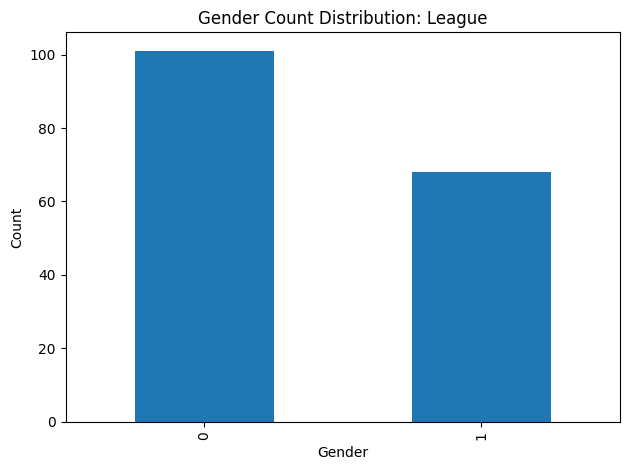

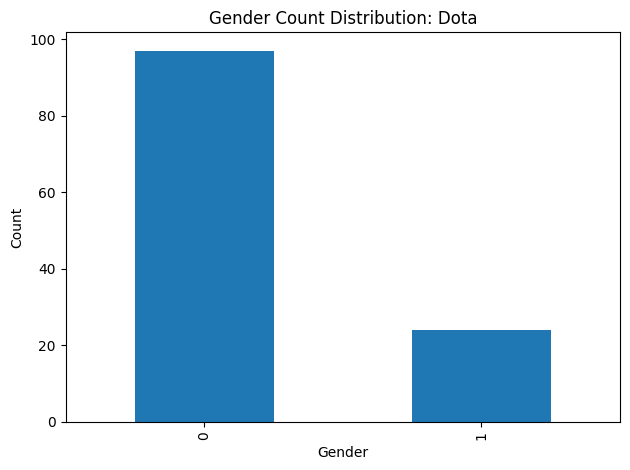

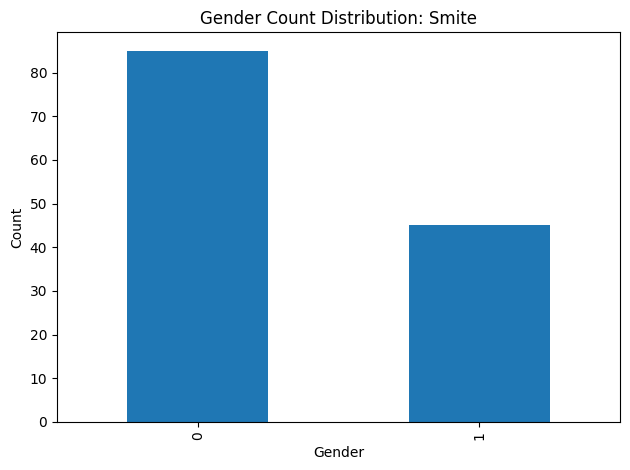

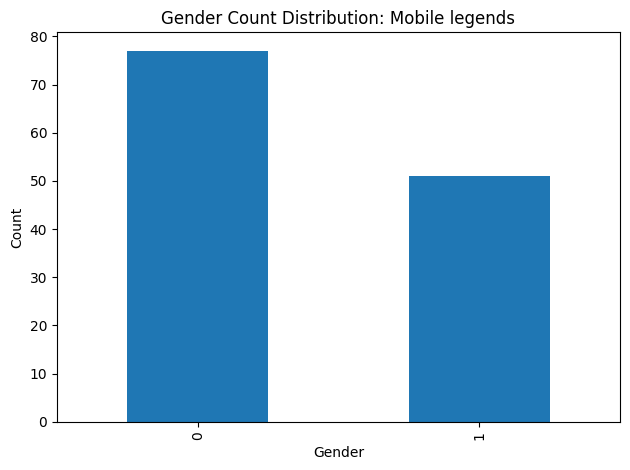

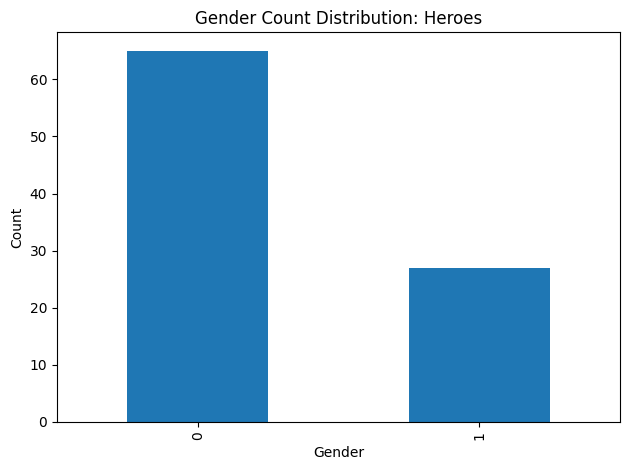

{'league':         count    percent
gender                  
0         101  59.763314
1          68  40.236686, 'dota':         count    percent
gender                  
0          97  80.165289
1          24  19.834711, 'smite':         count    percent
gender                  
0          85  65.384615
1          45  34.615385, 'mobile legends':         count   percent
gender                 
0          77  60.15625
1          51  39.84375, 'heroes':         count    percent
gender                  
0          65  70.652174
1          27  29.347826}


In [9]:
game_cols = ['league', 'dota', 'smite', 'mobile legends', 'heroes']

dfs = {game: filtered_df[filtered_df[game] == 1] for game in game_cols}

stats_cols = [
    'hp', 'hplvl', 'hpregen', 'hpregenlvl',
    'mana', 'manalvl', 'manaregen', 'manaregenlvl',
    'armor', 'armorlvl', 'mr', 'mrlvl',
    'ad', 'adlvl', 'atkspd', 'atkspdlvl',
    'attackrange', 'movespeed'
]

stats_cols = [c for c in stats_cols if c in filtered_df.columns]

avg_stats = {game: dfs[game][stats_cols].mean() for game in dfs}
avg_stats_df = pd.DataFrame(avg_stats)

print(avg_stats_df)

gender_breakdowns = {}

for game in dfs:
    counts = dfs[game]['gender'].value_counts()
    percentages = dfs[game]['gender'].value_counts(normalize=True) * 100
    gender_breakdowns[game] = pd.DataFrame({
        'count': counts,
        'percent': percentages
    })

for game in game_cols:
    if game in gender_breakdowns:
        df_plot = gender_breakdowns[game]

        plt.figure()
        df_plot['count'].plot(kind='bar')
        plt.title(f"Gender Count Distribution: {game.capitalize()}")
        plt.xlabel("Gender")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
print(gender_breakdowns)

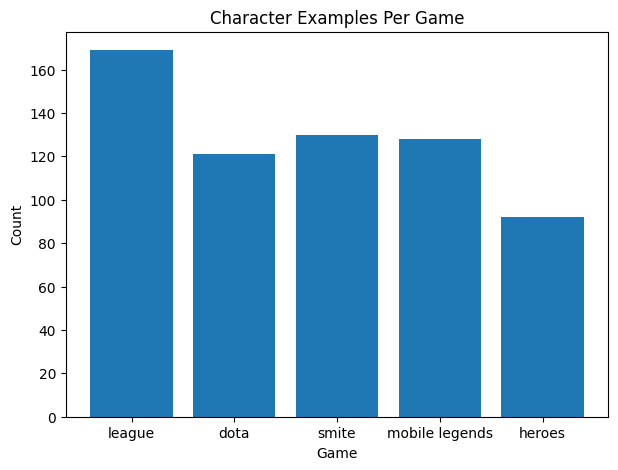

{'league': np.int64(169), 'dota': np.int64(121), 'smite': np.int64(130), 'mobile legends': np.int64(128), 'heroes': np.int64(92)}


In [19]:
# game distribution

games = ["league", "dota", "smite", "mobile legends", "heroes"]
game_counts = {g: filtered_df[g].sum() for g in games}

plt.figure(figsize=(7,5))
plt.bar(game_counts.keys(), game_counts.values())
plt.title("Character Examples Per Game")
plt.xlabel("Game")
plt.ylabel("Count")
plt.show()

print(game_counts)

In [50]:
filtered_df.to_csv("MOBA_df.csv")

In [ ]:
#fed initial code through ChatGPT to clean up - assist with merging scaled data
game_cols = ['league', 'dota', 'heroes', 'mobile legends', 'smite']

binary_cols = [
    'meleerange',
    'rangedrange',
    'manaresource',
    'support',
    'gender'
]

exclude_from_scaling = game_cols + binary_cols

names = filtered_df['name']

def scale_subset(df):
    to_scale = df.drop(columns=exclude_from_scaling + ['name'])
    unscaled = df[binary_cols]

    scaler = StandardScaler()
    scaled = pd.DataFrame(
        scaler.fit_transform(to_scale),
        columns=to_scale.columns,
        index=df.index
    )

    # Recombine
    return pd.concat([scaled, unscaled], axis=1)


league_df_scaled = scale_subset(filtered_df[filtered_df['league'] == 1])
dota_df_scaled   = scale_subset(filtered_df[filtered_df['dota'] == 1])
heroes_df_scaled = scale_subset(filtered_df[filtered_df['heroes'] == 1])
mobile_df_scaled = scale_subset(filtered_df[filtered_df['mobile legends'] == 1])
smite_df_scaled  = scale_subset(filtered_df[filtered_df['smite'] == 1])


scaled_df = pd.concat(
    [
        league_df_scaled,
        dota_df_scaled,
        mobile_df_scaled,
        heroes_df_scaled,
        smite_df_scaled
    ],
    axis=0
)



scaled_df['name'] = names.loc[scaled_df.index]

scaled_df = scaled_df[['name'] + [c for c in scaled_df.columns if c != 'name']]


scaled_df = scaled_df.reset_index(drop=True)


In [11]:
scaled_df.to_csv("standardized.csv")

#not including game columns so that model does not cheat and guess based on game, now that its all standardized